<a href="https://colab.research.google.com/github/DhruveSR/UI-elements-detection/blob/main/UI_element_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   List item
*   List item



In [ ]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import os
from PIL import Image
import yaml
from IPython.display import display, Image

In [ ]:
# check if gpu is available
!nvidia-smi

Sat Apr 20 01:57:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##Dataset Information

In [ ]:
# dataset paths
labels_dir = '/content/drive/MyDrive/UI elements detection using YOLOv8/train/labels'
images_dir = '/content/drive/MyDrive/UI elements detection using YOLOv8/train/images'

In [ ]:
# count images per class
def count_images_per_class(labels_dir):
    images_per_class = {}

    # read each line in all txt files
    for filename in os.listdir(labels_dir):
        with open(os.path.join(labels_dir, filename), 'r') as file:
            lines = file.readlines()

        # count the class in the line
        for line in lines:
            class_name = line.split()[0]
            images_per_class[class_name] = images_per_class.get(class_name, 0) + 1

    return images_per_class

In [ ]:
images_per_class = count_images_per_class(labels_dir)
print("Images per class:", images_per_class)

Images per class: {'46': 5047, '47': 5909, '15': 12802, '27': 1324, '36': 45514, '39': 5929, '14': 18762, '43': 4423, '35': 340, '11': 3063, '8': 878, '1': 668, '34': 20, '24': 229, '2': 13, '25': 15, '42': 135, '0': 36, '13': 135, '9': 22, '12': 33, '45': 10, '20': 48, '23': 37, '6': 21, '18': 11, '38': 107, '5': 159, '10': 49, '7': 54, '4': 132, '28': 30, '40': 8, '41': 10, '3': 71, '16': 282, '17': 176, '31': 2, '29': 10, '30': 168, '32': 86, '37': 1254, '19': 196, '33': 16, '44': 2, '26': 6, '21': 18, '22': 1}


In [ ]:
# load the yaml file
with open('data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# get class names
class_names = data['names']

# Create a dictionary to map class numbers to class names
class_map = {i: class_names[i] for i in range(len(class_names))}

# Count images per class
images_per_class = count_images_per_class(labels_dir)

# Print class names and number of images per class
print("Images per class:")
for class_num, num_images in images_per_class.items():
    print(f"{class_map[class_num]} ({class_num}): {num_images}")

In [ ]:
print(sum(images_per_class.values()))

108261


In [ ]:
# set the root directory
ROOT_DIR = '/content/drive/MyDrive/UI elements detection using YOLOv8'

## Training the model

###5 epochs

In [ ]:
#loading a YOLOv8 pre-trained model
pt_model = YOLO("yolov8n.pt")

#training the model on my custom dataset
my_model = pt_model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=5)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/UI elements detection using YOLOv8/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

train: Scanning /content/drive/MyDrive/UI elements detection using YOLOv8/train/labels... 6618 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6618/6618 [34:39<00:00,  3.18it/s]

train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/38792_jpg.rf.56f3167255509f094b1e8504d341d509.jpg: 8 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40185_jpg.rf.7a9284dc0e301fb9031a11a2c1a46f13.jpg: 9 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40742_jpg.rf.8f291ebed9db10553778e78ab1e52130.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40787_jpg.rf.6ac9e38d8d0b494e4e63f21c4af9e06b.jpg: 18 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40805_jpg.rf.4572be9a639809b96f745110f0ff07df.jpg: 12 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40809_jpg.rf.746a8389d897966449ead91dd90c3288.jpg: 1 duplicate labels remo

train: New cache created: /content/drive/MyDrive/UI elements detection using YOLOv8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/UI elements detection using YOLOv8/valid/labels.cache... 865 images, 9 backgrounds, 0 corrupt: 100%|██████████| 874/874 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000192, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      3.67G      1.603      3.378      1.324        239        640: 100%|██████████| 414/414 [03:42<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:12<00:00,  2.16it/s]


                   all        874      12255      0.796      0.157      0.171      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      3.74G      1.286      1.891      1.168        188        640: 100%|██████████| 414/414 [03:26<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.08it/s]


                   all        874      12255      0.527      0.217      0.237      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      3.82G      1.178      1.597      1.114        248        640: 100%|██████████| 414/414 [03:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]


                   all        874      12255      0.484      0.283      0.302      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.23G      1.127      1.466      1.088        257        640: 100%|██████████| 414/414 [03:22<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.10it/s]


                   all        874      12255      0.515      0.309      0.348      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      3.77G      1.081      1.403      1.072        291        640: 100%|██████████| 414/414 [03:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]


                   all        874      12255      0.557      0.335      0.369      0.281

5 epochs completed in 0.309 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3015008 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:33<00:00,  1.20s/it]


                   all        874      12255      0.556      0.335      0.369       0.28
       BackgroundImage        874        114      0.648      0.763      0.794      0.667
     Bottom_Navigation        874          2          0          0          0          0
       Button-Outlined        874         14          1          0          0          0
         Button-filled        874         16          1          0      0.335      0.283
              Checkbox        874          8          0          0          0          0
       CheckedTextView        874        155          1          0     0.0127    0.00587
         dropdown Form        874          3          0          0          0          0
              EditText        874        434      0.558      0.836      0.788       0.56
                  Icon        874       2194      0.728      0.795      0.772      0.583
                 Image        874       1593      0.615      0.815      0.814      0.738
                 Moda

#### Training results

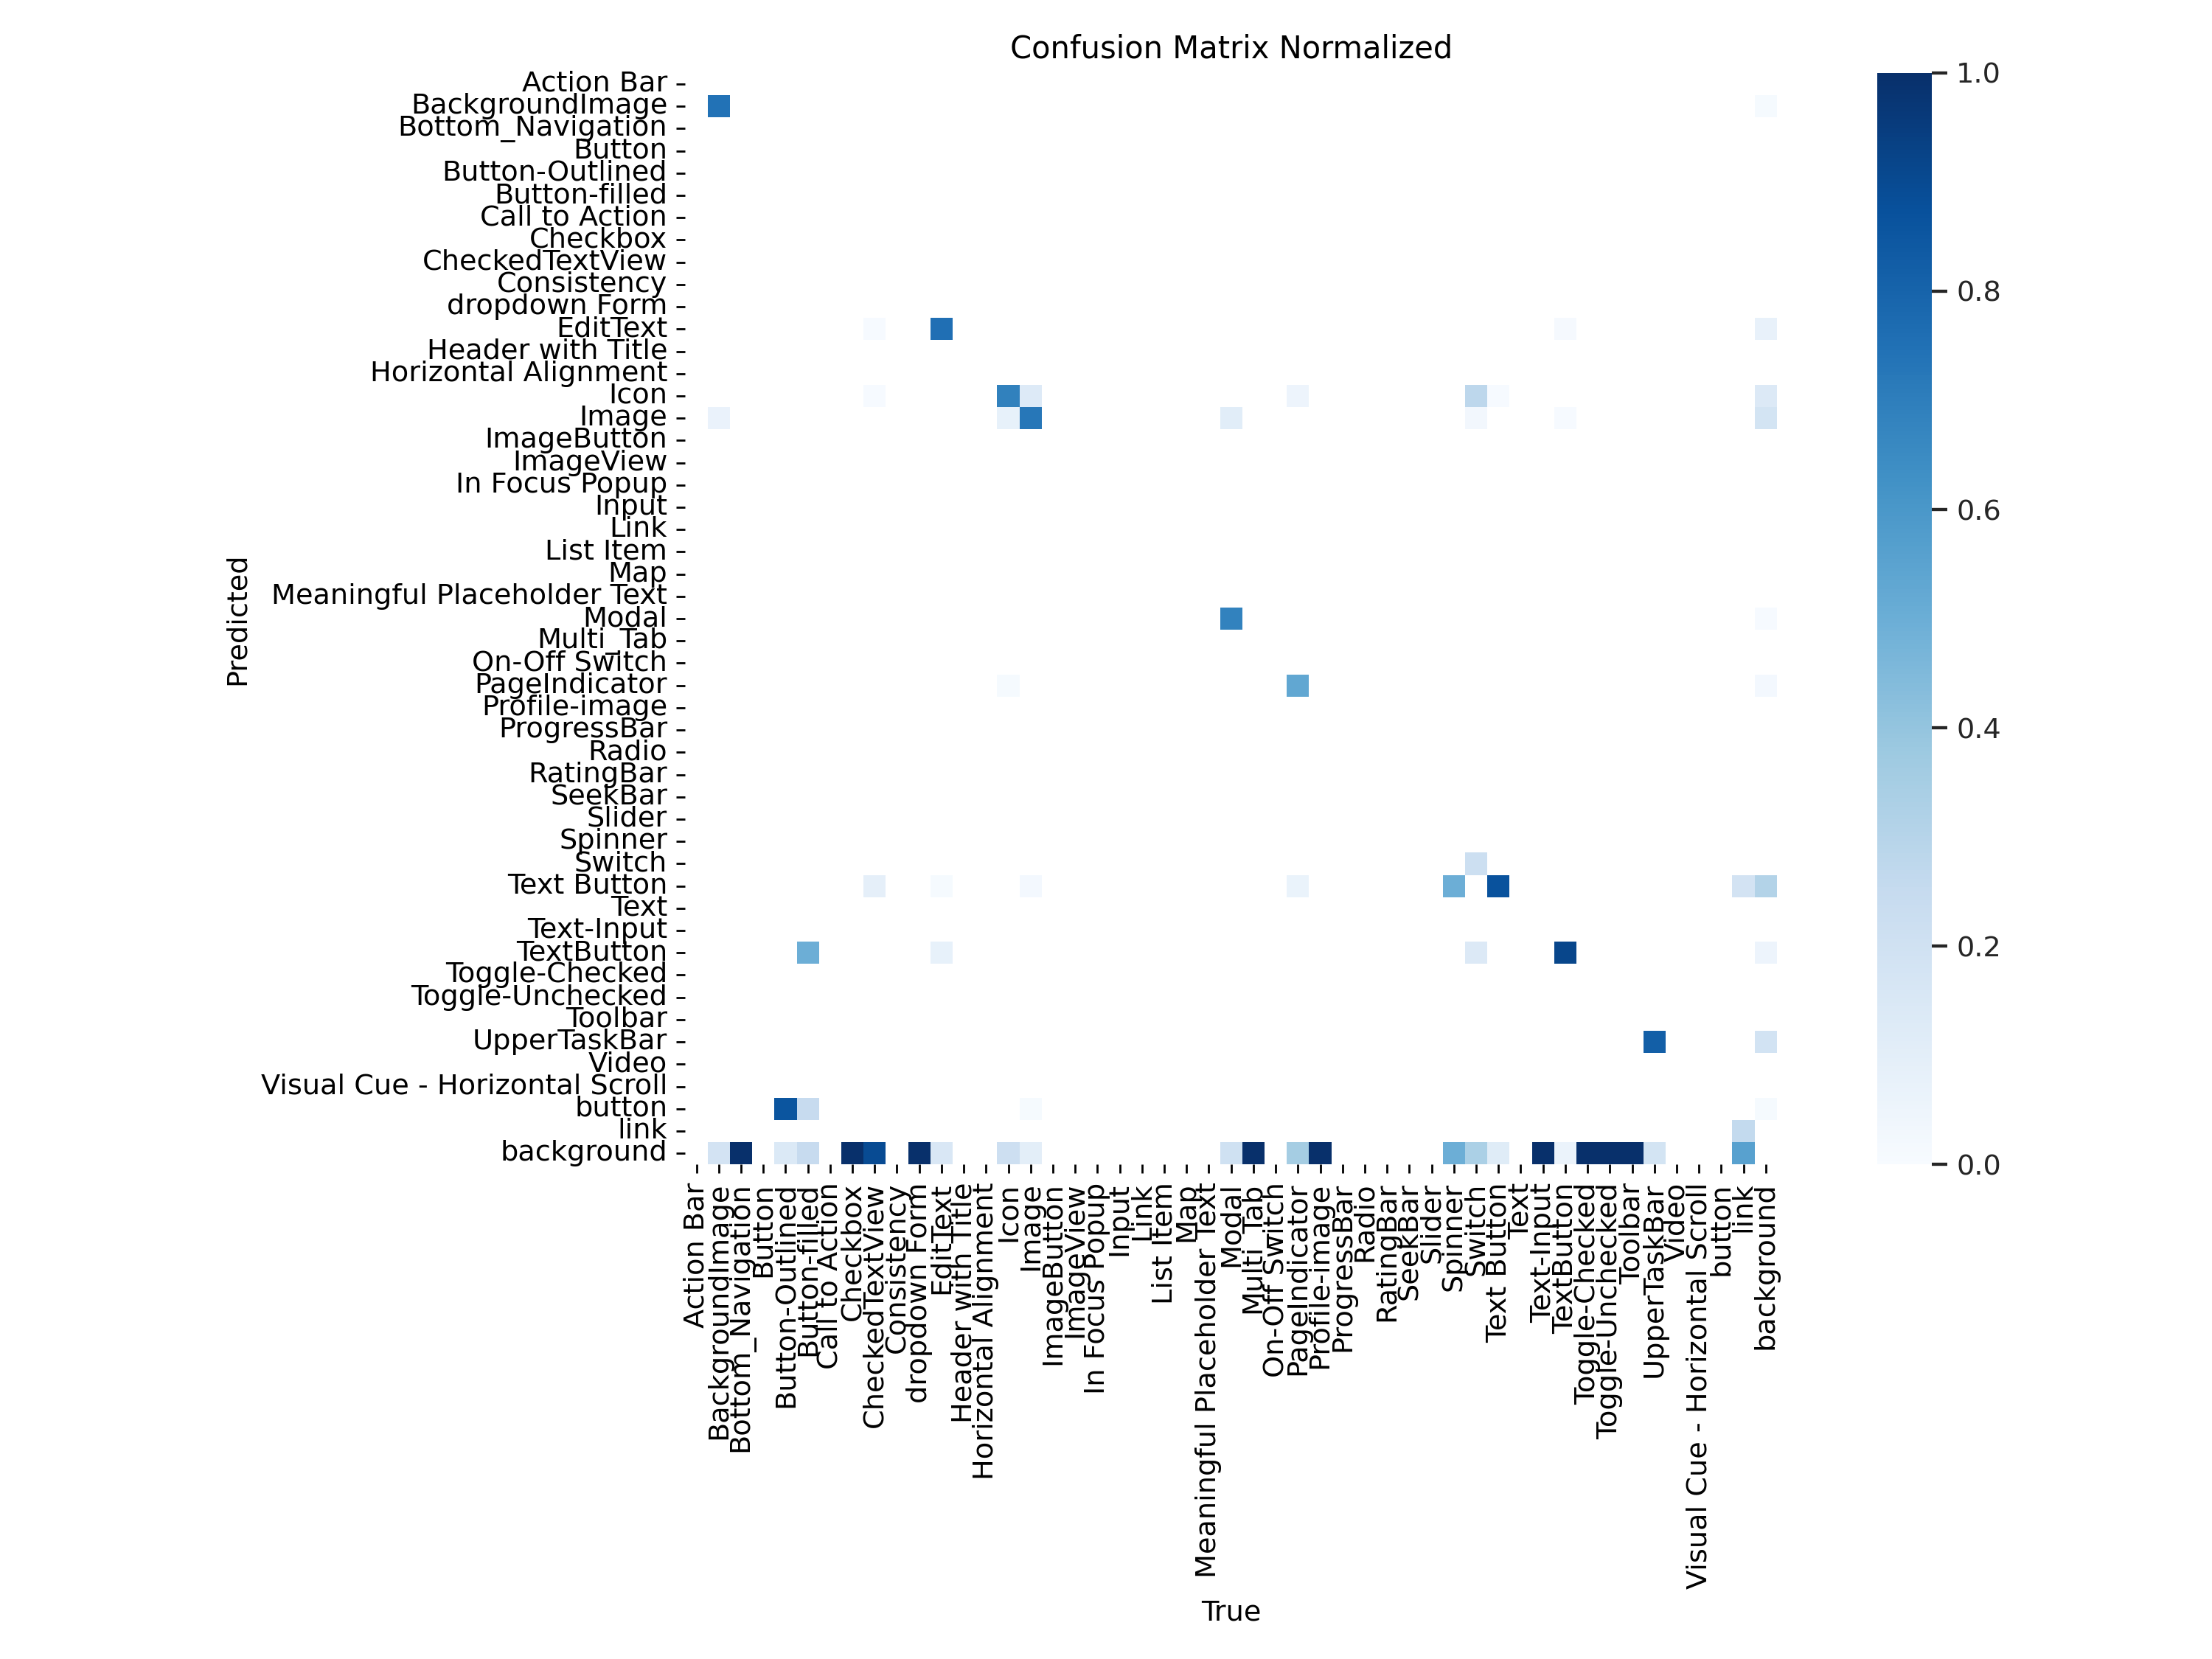

In [ ]:
# display the confusion matrix
img = Image.open('runs/detect/train2/confusion_matrix_normalized.png')
img

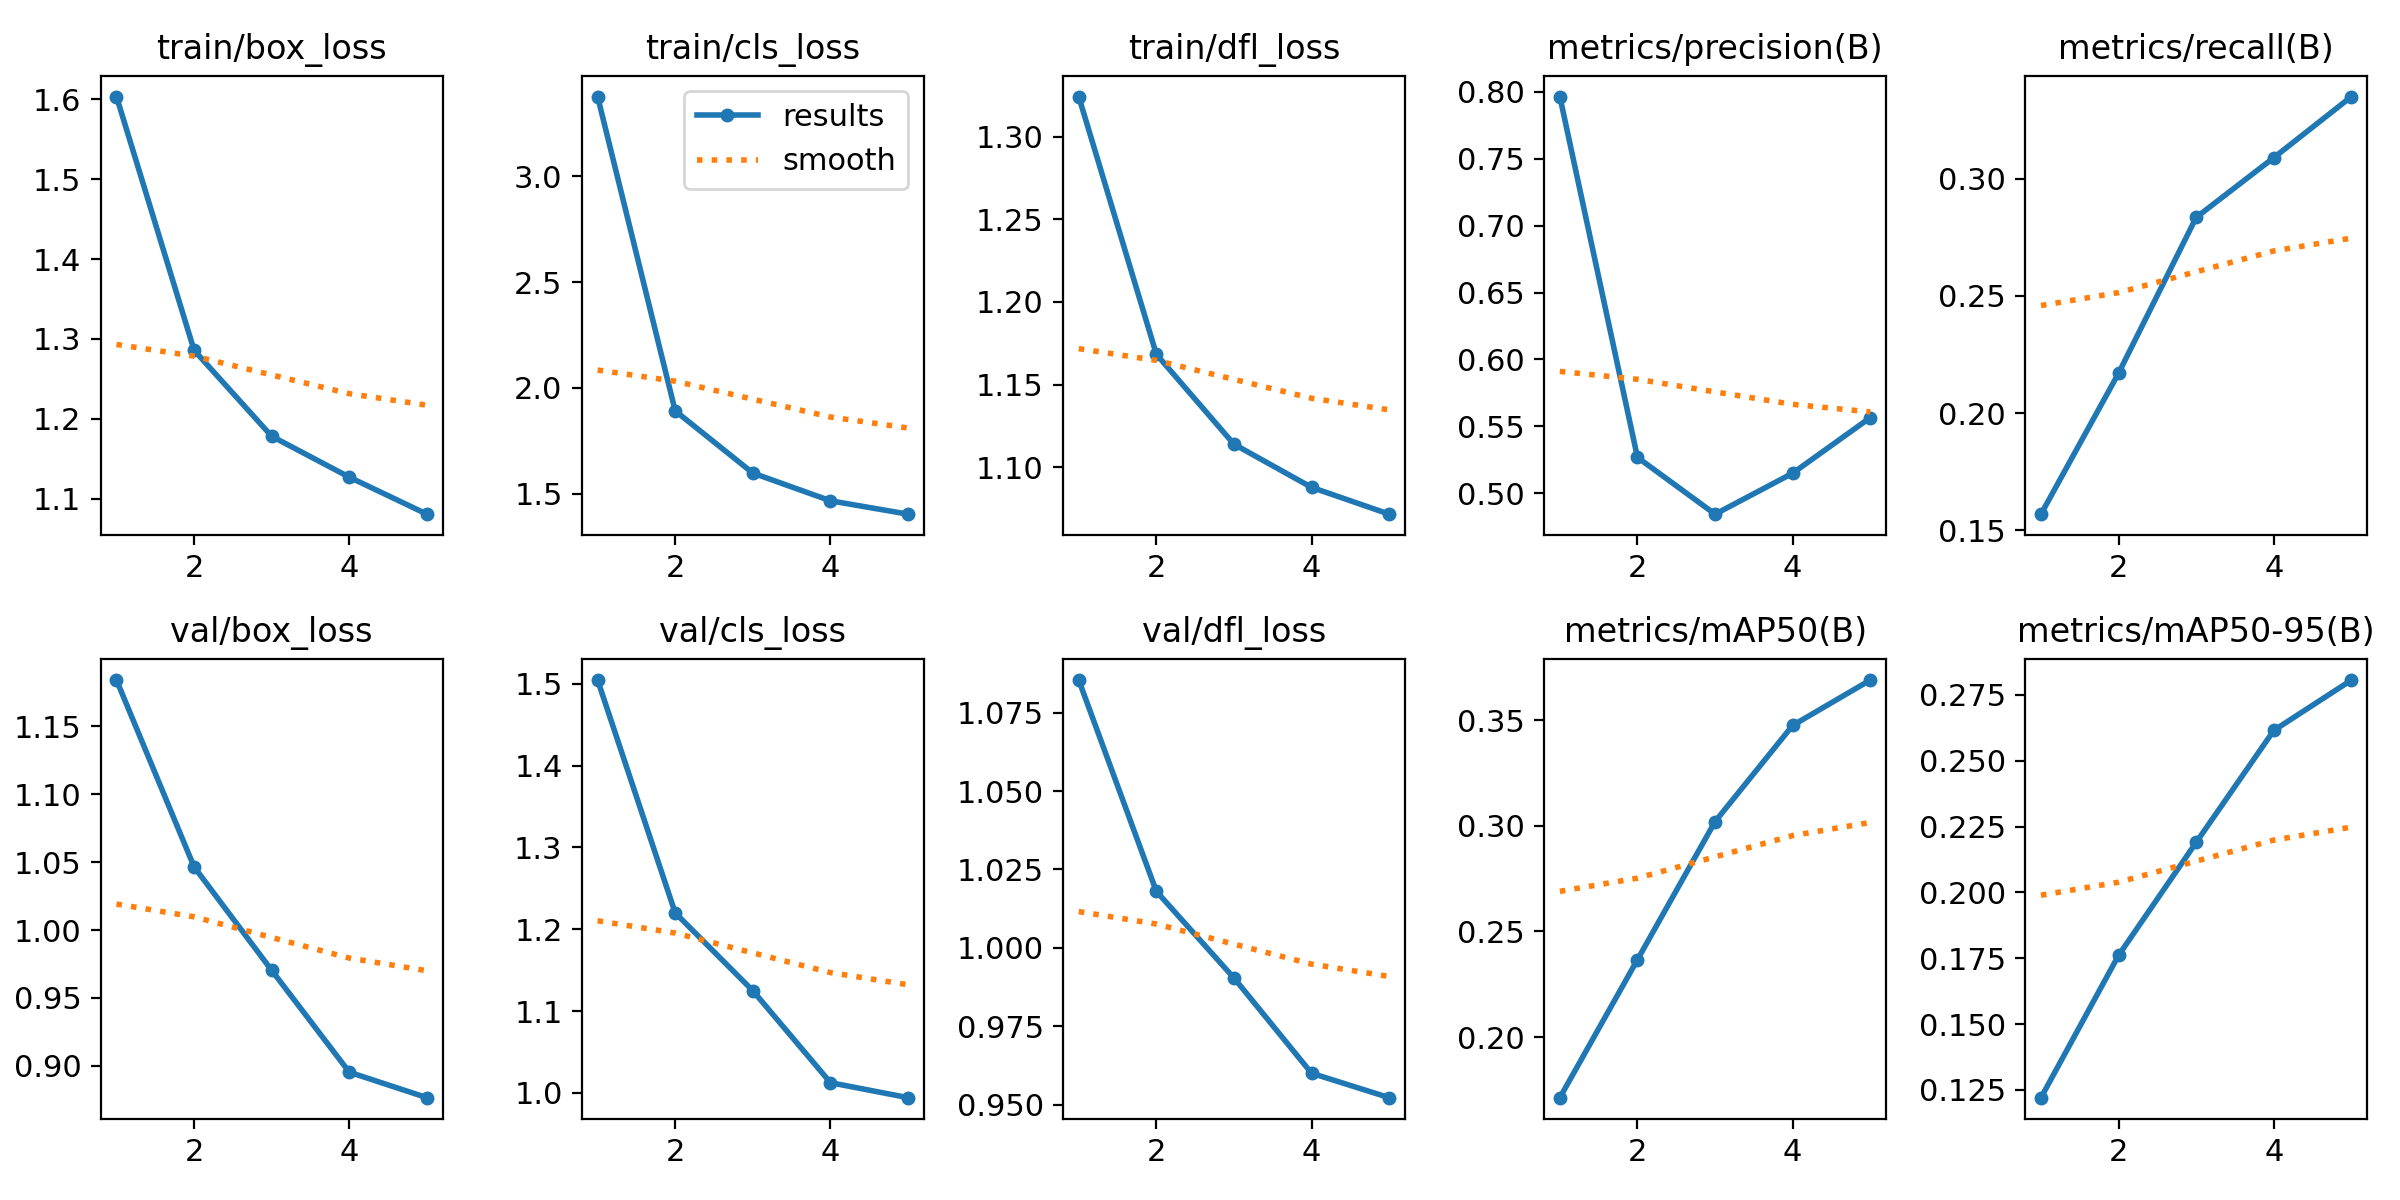

In [ ]:
# display the training results
img = Image.open('runs/detect/train2/results.png')
img

###25 epochs

In [ ]:
#loading a YOLOv8 pre-trained model
pt_model = YOLO("yolov8n.pt")

#training the model on my custom dataset
my_model = pt_model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=25)

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/UI elements detection using YOLOv8/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning /content/drive/MyDrive/UI elements detection using YOLOv8/train/labels.cache... 6618 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6618/6618 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/38792_jpg.rf.56f3167255509f094b1e8504d341d509.jpg: 8 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40185_jpg.rf.7a9284dc0e301fb9031a11a2c1a46f13.jpg: 9 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40742_jpg.rf.8f291ebed9db10553778e78ab1e52130.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40787_jpg.rf.6ac9e38d8d0b494e4e63f21c4af9e06b.jpg: 18 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40805_jpg.rf.4572be9a639809b96f745110f0ff07df.jpg: 12 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/UI elements detection using YOLOv8/train/images/40809_jpg.rf.746a8389d897966449ead91dd90c3288.jpg: 1 duplicate labels remo


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/UI elements detection using YOLOv8/valid/labels.cache... 865 images, 9 backgrounds, 0 corrupt: 100%|██████████| 874/874 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000192, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      4.25G      1.603      3.378      1.324        239        640: 100%|██████████| 414/414 [03:41<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]


                   all        874      12255      0.796      0.157      0.171      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25       3.9G       1.28      1.863      1.165        188        640: 100%|██████████| 414/414 [03:36<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:14<00:00,  1.91it/s]


                   all        874      12255      0.485      0.234      0.249      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.96G       1.17      1.562      1.108        248        640: 100%|██████████| 414/414 [03:36<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:17<00:00,  1.56it/s]


                   all        874      12255       0.51      0.269      0.325      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.37G      1.113      1.419      1.076        257        640: 100%|██████████| 414/414 [03:20<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]


                   all        874      12255      0.518      0.316      0.366      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.91G      1.065      1.341      1.055        291        640: 100%|██████████| 414/414 [03:21<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]


                   all        874      12255      0.586      0.326      0.388      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.65G      1.047      1.282      1.044        204        640: 100%|██████████| 414/414 [03:22<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]


                   all        874      12255      0.533      0.342      0.417      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25       4.3G      1.009      1.229      1.026        190        640: 100%|██████████| 414/414 [03:18<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.04it/s]


                   all        874      12255      0.538      0.338      0.409      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.14G     0.9907      1.205      1.017        257        640: 100%|██████████| 414/414 [03:22<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.10it/s]


                   all        874      12255      0.433      0.409      0.432      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.37G     0.9672      1.162      1.007        191        640: 100%|██████████| 414/414 [03:17<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.11it/s]


                   all        874      12255      0.507      0.415      0.438      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.61G     0.9608      1.133      1.004        241        640: 100%|██████████| 414/414 [03:22<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.07it/s]


                   all        874      12255      0.535      0.464      0.461      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.23G     0.9465      1.117     0.9949        241        640: 100%|██████████| 414/414 [03:20<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]


                   all        874      12255      0.525      0.475      0.471      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.41G     0.9344      1.097     0.9909        220        640: 100%|██████████| 414/414 [03:18<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.68it/s]


                   all        874      12255      0.517      0.456       0.47      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.25G     0.9225      1.071     0.9843        254        640: 100%|██████████| 414/414 [03:17<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.04it/s]


                   all        874      12255      0.534      0.483       0.48      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.09G      0.915      1.054     0.9822        200        640: 100%|██████████| 414/414 [03:17<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]


                   all        874      12255      0.546      0.482      0.479      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      3.93G     0.9116      1.049      0.982        284        640: 100%|██████████| 414/414 [03:20<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.09it/s]


                   all        874      12255      0.574      0.471      0.485      0.383
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.26G     0.9363      1.071     0.9829         85        640: 100%|██████████| 414/414 [03:02<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.08it/s]


                   all        874      12255      0.569      0.461       0.52      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      4.09G     0.9216      1.028     0.9726        125        640: 100%|██████████| 414/414 [02:57<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.13it/s]


                   all        874      12255      0.548      0.491      0.516      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      3.93G      0.911      1.007     0.9688        181        640: 100%|██████████| 414/414 [03:00<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]


                   all        874      12255      0.634      0.482      0.534      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      3.54G      0.897     0.9879     0.9634        153        640: 100%|██████████| 414/414 [02:57<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]


                   all        874      12255      0.573      0.517       0.54      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      3.97G     0.8876     0.9713     0.9619        165        640: 100%|██████████| 414/414 [02:57<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:12<00:00,  2.16it/s]


                   all        874      12255       0.64      0.492      0.537      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       4.1G      0.884     0.9616     0.9575        111        640: 100%|██████████| 414/414 [02:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:16<00:00,  1.75it/s]


                   all        874      12255       0.64      0.496      0.546      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      4.57G      0.874     0.9445     0.9538        133        640: 100%|██████████| 414/414 [02:57<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.06it/s]


                   all        874      12255      0.557      0.501      0.545      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       4.1G     0.8674     0.9382     0.9527        131        640: 100%|██████████| 414/414 [02:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.08it/s]


                   all        874      12255      0.562      0.514      0.552      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      3.87G     0.8653     0.9321     0.9516        101        640: 100%|██████████| 414/414 [02:58<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.09it/s]


                   all        874      12255      0.559      0.495      0.546      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.54G     0.8593     0.9223     0.9503        126        640: 100%|██████████| 414/414 [03:00<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.11it/s]


                   all        874      12255      0.599      0.497      0.546      0.433

25 epochs completed in 1.453 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.3MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3015008 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:31<00:00,  1.11s/it]


                   all        874      12255       0.56      0.516      0.552      0.436
       BackgroundImage        874        114      0.766      0.949      0.934      0.845
     Bottom_Navigation        874          2          1          0          0          0
       Button-Outlined        874         14      0.205     0.0739      0.278      0.199
         Button-filled        874         16      0.899      0.555      0.642      0.545
              Checkbox        874          8          0          0          0          0
       CheckedTextView        874        155      0.673      0.585      0.598      0.238
         dropdown Form        874          3          0          0      0.128      0.104
              EditText        874        434      0.714      0.963      0.935      0.782
                  Icon        874       2194      0.784      0.928       0.91      0.723
                 Image        874       1593      0.714      0.901      0.901      0.842
                 Moda

#### Training reults

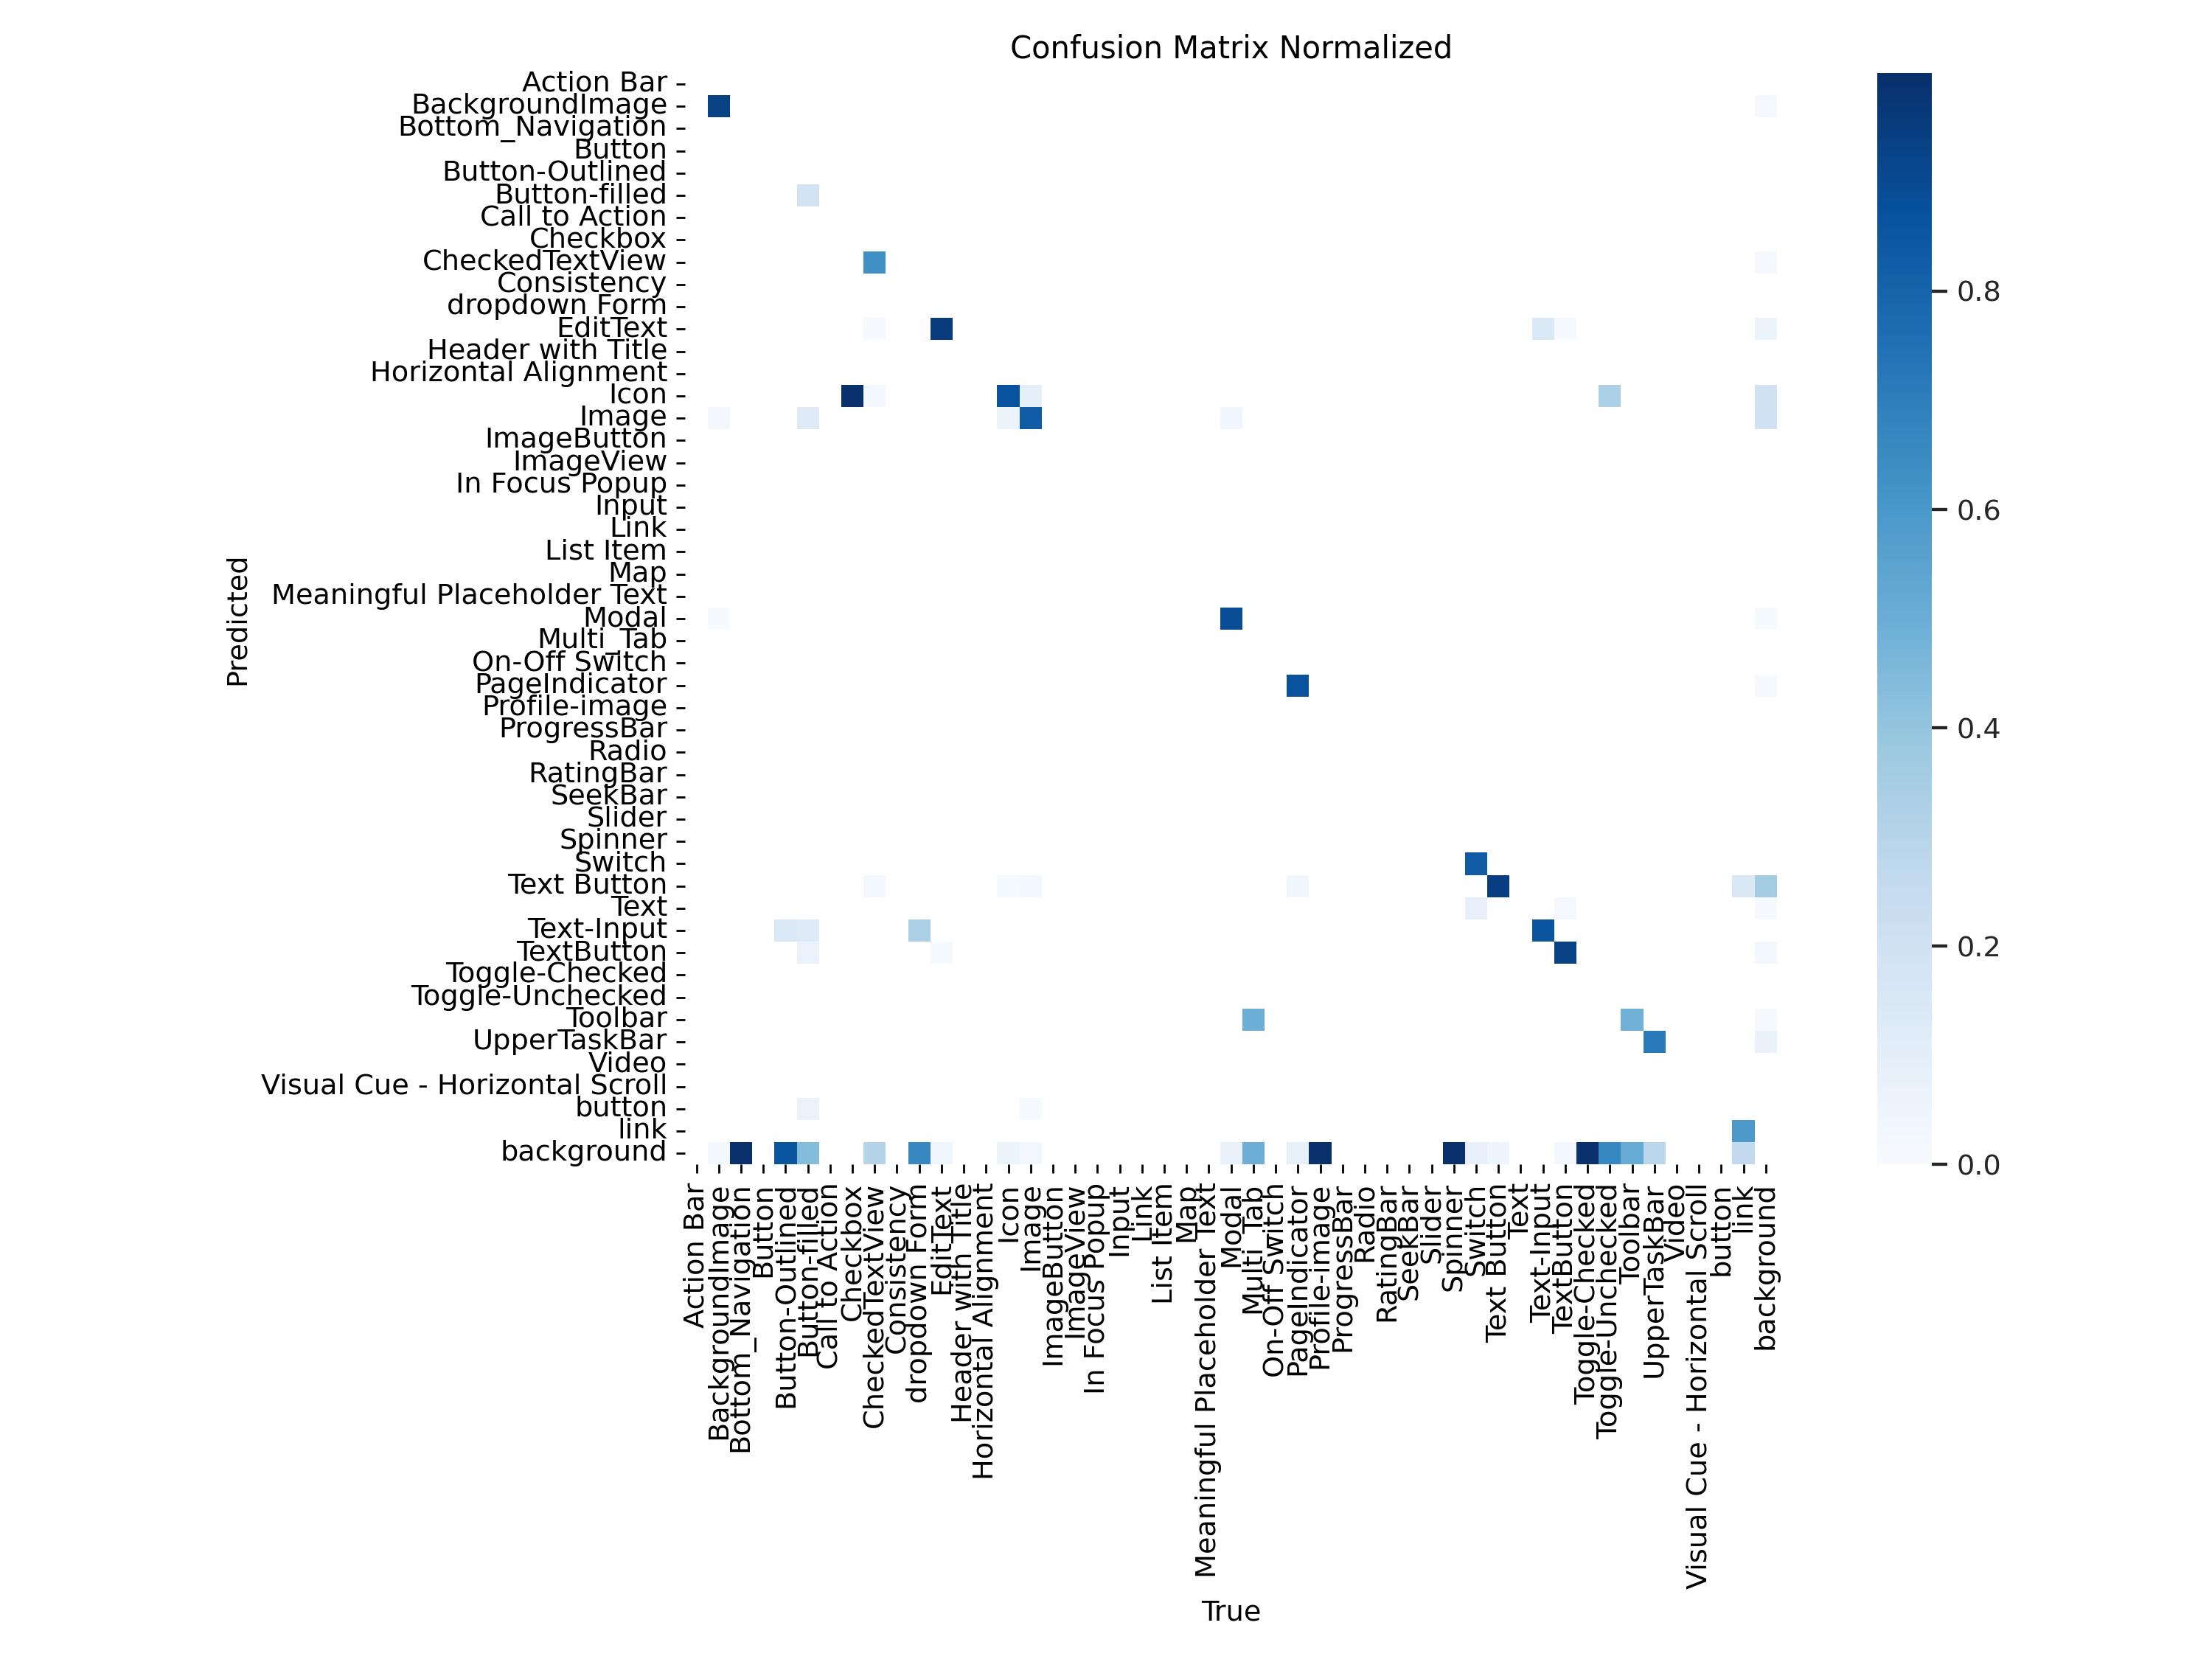

In [ ]:
# display the confusion matrix
img = Image.open('runs/detect/train4/confusion_matrix_normalized.png')
img

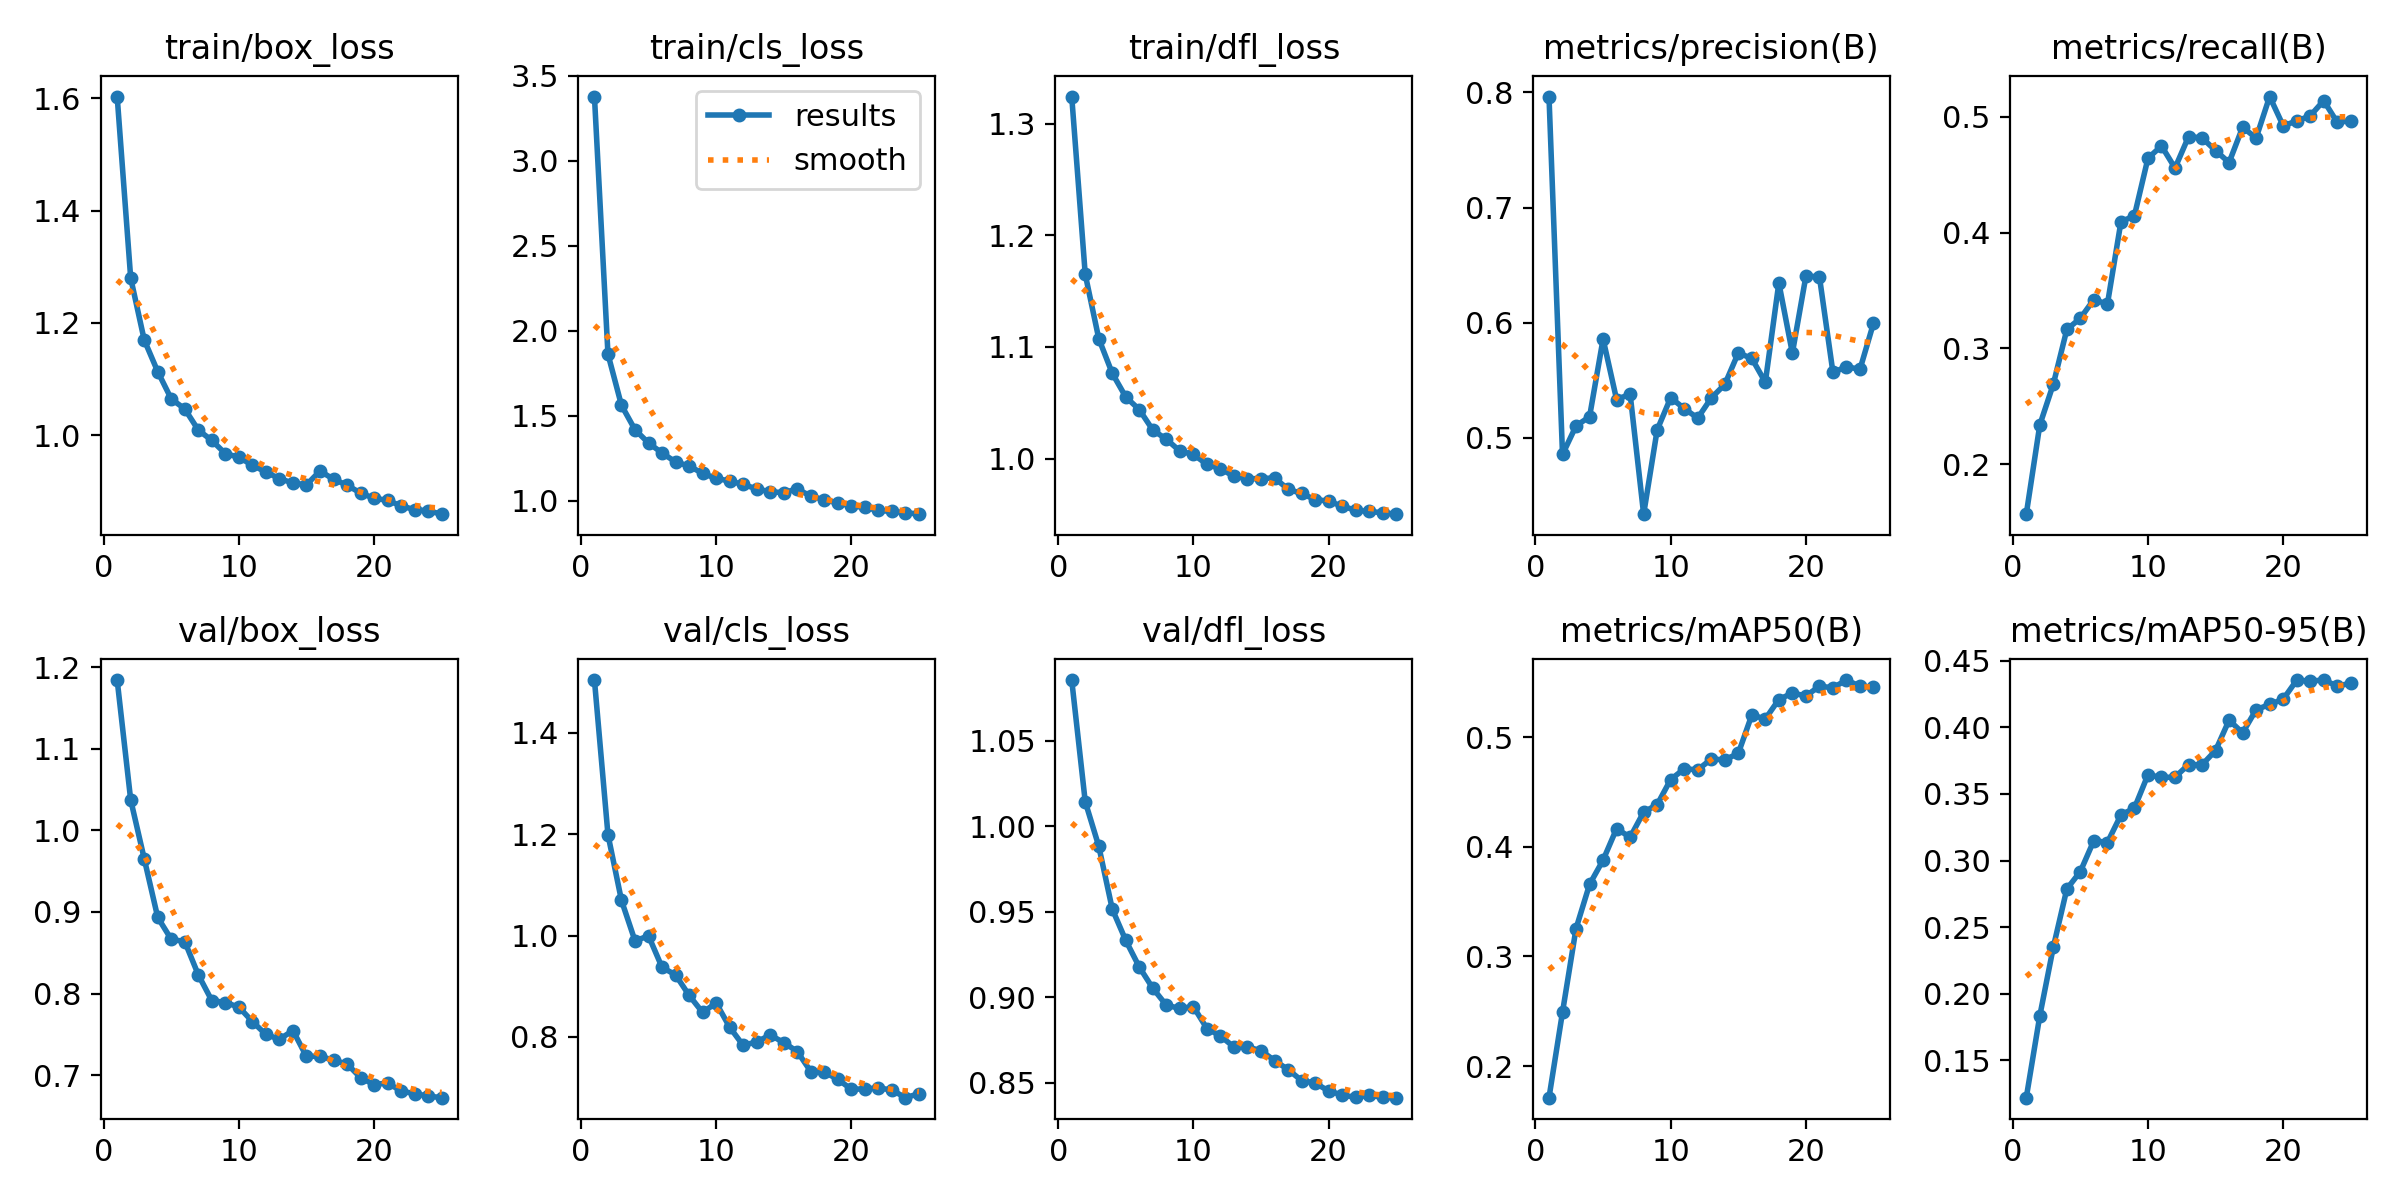

In [ ]:
# display the training results
img = Image.open('runs/detect/train4/results.png')
img

##Making Predictions on Figma sample images

In [ ]:
# making predictions and storing them
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt source='/content/drive/MyDrive/UI elements detection using YOLOv8/Figma images test'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008378 parameters, 0 gradients, 8.1 GFLOPs

image 1/3 /content/drive/MyDrive/UI elements detection using YOLOv8/Figma images test/Figma_test_1.png: 640x320 1 TextView, 79.9ms
image 2/3 /content/drive/MyDrive/UI elements detection using YOLOv8/Figma images test/Figma_test_2.png: 640x320 3 Buttons, 3 EditTexts, 3 ImageViews, 1 TextView, 8.3ms
image 3/3 /content/drive/MyDrive/UI elements detection using YOLOv8/Figma images test/Figma_test_3.png: 640x320 2 Buttons, 6 ImageViews, 6 TextViews, 13.2ms
Speed: 2.2ms preprocess, 33.8ms inference, 188.0ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


#### Image 1

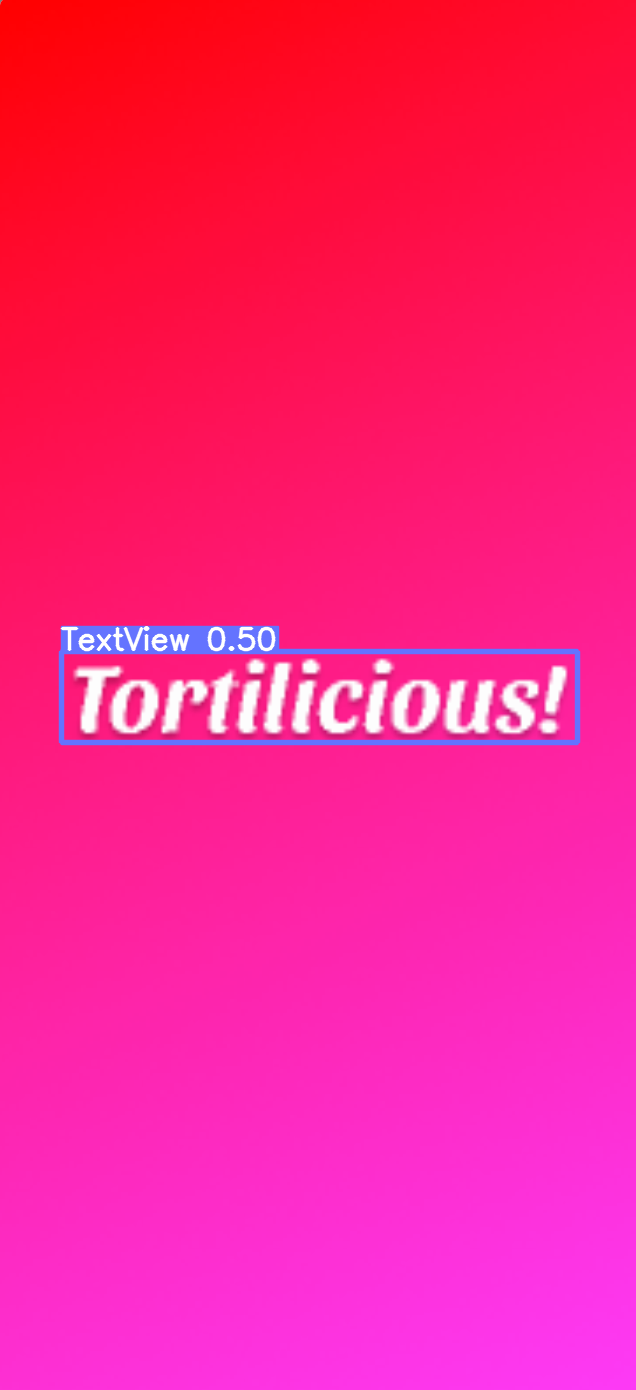

In [ ]:
display(Image(filename='/content/runs/detect/predict/Figma_test_1.png'))

#### Image 2

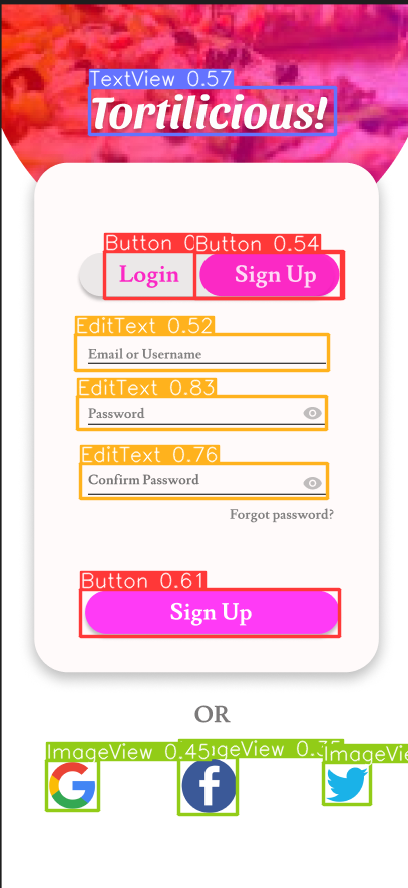

In [ ]:
display(Image(filename='/content/runs/detect/predict/Figma_test_2.png'))

#### Image 3

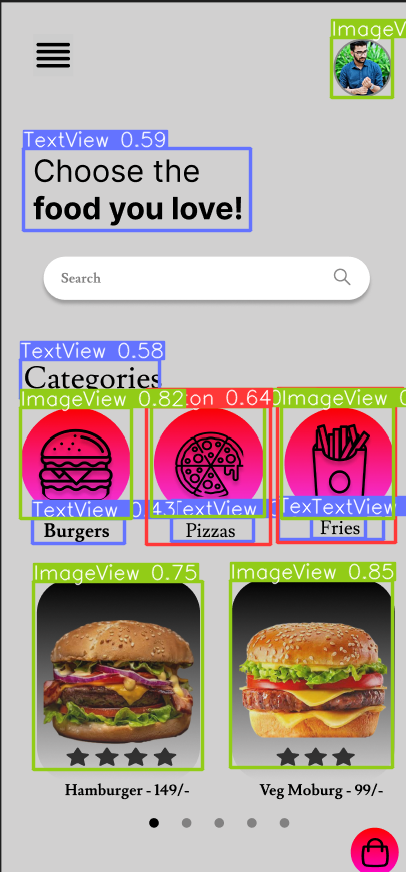

In [ ]:
display(Image(filename='/content/runs/detect/predict/Figma_test_3.png'))